## Kelompok 3 : Klasifikasi & Regresi menggunakan Model Support Vector Machine (SVM) pada Dataset Order Payment Olist

# Tahapan code untuk persiapan data
1. Koneksi colab dengan GDrive
2. Tampilkan isi folder dataset_ilmu_data
3. Import library yang dibutuhkan
4. Load dataset
5. Tampilkan contoh data

# Deskripsi Klasifikasi

Dataset olist_order_payments_dataset.xlsx berisi informasi transaksi pembayaran pelanggan pada platform e-commerce Olist. Data mencakup 103.886 baris dan 5 kolom, dengan atribut-atribut berikut:

order_id: ID unik untuk setiap pesanan.

payment_sequential: Urutan ke berapa pembayaran dilakukan (jika ada cicilan).

payment_type: Jenis metode pembayaran (misalnya credit_card, boleto, dsb).

payment_installments: Jumlah cicilan yang dipilih oleh pelanggan.

payment_value: Total nilai pembayaran (dalam Real Brasil, BRL).

Proyek ini bertujuan untuk melakukan klasifikasi dan regresi terhadap pelanggan berdasarkan nilai pembelian mereka.

1. Klasifikasi
Tujuan: Mengelompokkan pelanggan menjadi dua kelas:
High Spending Customer: pelanggan dengan nilai pembayaran tinggi.
Low Spending Customer: pelanggan dengan nilai pembayaran rendah.

Label target: Dibuat berdasarkan batas nilai tertentu dari payment_value (misalnya threshold median atau kuartil).



# Deskripsi Regresi

Regresi menggunakan dataset olist_product_dataset.xlsx untuk memprediksi berat produk bertujuan untuk memperkirakan berat produk dalam gram berdasarkan atribut seperti dimensi (panjang, tinggi, lebar), jumlah foto, kategori produk, dan panjang deskripsi. Dengan memanfaatkan algoritma regresi, model akan membantu mengisi data berat yang hilang atau tidak tersedia, yang sangat penting untuk logistik, penghitungan biaya pengiriman, dan manajemen inventaris. Fitur-fitur seperti dimensi produk digunakan karena secara langsung memengaruhi berat, sementara kategori dan panjang deskripsi memberikan konteks tambahan yang relevan untuk analisis. Model ini diharapkan mampu memberikan prediksi akurat, meningkatkan efisiensi operasional dalam pengelolaan data produk.

Label (Target): product_weight_g

Fitur (Features): product_length_cm, product_height_cm, product_width_cm, product_photos_qt, product_category (akan diencode), product_desc_length



## Koneksi colab dengan GDrive





In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Tampilkan isi folder

In [10]:
import pandas as pd

file_path = "/content/drive/MyDrive/Classroom/Kelompok 3/olist_order_payments_dataset.xlsx"
df = pd.read_excel(file_path)

print(df.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [11]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import xgboost as xgb

## Load dataset

In [12]:
#load data google drive
df = pd.read_excel('/content/drive/MyDrive/Classroom/Kelompok 3/olist_order_payments_dataset.xlsx')
print (df.shape)

(103886, 5)


## Tampilkan contoh data

In [13]:
df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
print(df.tail(10))

                                order_id  payment_sequential payment_type  \
103876  0872d0faafe0cb56e6f2c594cca1522c                   1  credit_card   
103877  3531718b24dfd5022fb0d101e10e33b9                   1  credit_card   
103878  2e3d96522c8c378d4135c12a65c977aa                   1  credit_card   
103879  c45067032fd84f4cf408730ff5205568                   1  credit_card   
103880  7159096c5aa9be77f7f0c26c01ee9793                   1  credit_card   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
103876                     2         127.92  
103877                     1         194.11  
103878        

# Klasifikasi menggunakan SVM

Selain KNN, dan Decision Tree, klasifikasi juga dapat menggunakan model SVM. Tahapan untuk menggunakan model tsb adalah sama dengan klasifikasi, kecuali hanya pada penggunaan method-nya saja.

* Tahapan code untuk persiapan data sama dengan classification. Lihat contoh di atas



### 1) Pilih fitur yang akan digunakan

Tahap ini sama dengan code di classification, yaitu memilih fitur dari dataset.

In [16]:
from sklearn.preprocessing import LabelEncoder
# Memilih fitur numerik

X = df[['payment_sequential', 'payment_installments', 'payment_value']]

# Label target (payment_type)

y = df['payment_type']

# Encode target label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [17]:
# Agregasi total payment per payment_type
agg_df = df.groupby('payment_type').sum(numeric_only=True).reset_index()
agg_df = agg_df[['payment_type', 'payment_value']]
agg_df = agg_df.sort_values(by='payment_value', ascending=False)

print("Total pengeluaran per payment_type:")
print(agg_df)

Total pengeluaran per payment_type:
  payment_type  payment_value
1  credit_card    12542084.19
0       boleto     2869361.27
4      voucher      379436.87
2   debit_card      217989.79
3  not_defined           0.00


In [18]:
# Labeling: High spender jika payment_value > 2000000
import pandas as pd

# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Classroom/Kelompok 3/olist_order_payments_dataset.xlsx')
df_grouped = df.groupby('payment_type').sum(numeric_only=True).reset_index()
df_grouped['label'] = df_grouped['payment_value'].apply(lambda x: 1 if x > 2000000 else 0)

In [19]:
# Gabungkan kembali label ke dataset asli
df = df.merge(df_grouped[['payment_type', 'label']], on='payment_type', how='left')

In [20]:
# 4. Seleksi fitur
X = df[['payment_sequential', 'payment_installments', 'payment_value']]
y = df['label']

### 2) Lakukan pre-processing (jika diperlukan)

In [21]:
import pandas as pd

# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Classroom/Kelompok 3/olist_order_payments_dataset.xlsx')

# Pilih fitur dan target
df = df[['payment_sequential', 'payment_type', 'payment_installments', 'payment_value']]

# Cek dan bersihkan nilai NaN
df = df.dropna()

# Hitung total payment_value per payment_type
total_payment_per_type = df.groupby('payment_type')['payment_value'].sum().reset_index()

# Tandai payment_type dengan total payment_value > 5000 sebagai "high spender" (label = 1)
# Ubah threshold jadi 200000
high_spender_types = total_payment_per_type[total_payment_per_type['payment_value'] > 2000000]['payment_type']

df['label'] = df['payment_type'].apply(lambda x: 1 if x in high_spender_types.values else 0)


In [22]:
print(high_spender_types.tolist())
print("Jumlah payment_type dengan total < 2000000:", len(high_spender_types))


['boleto', 'credit_card']
Jumlah payment_type dengan total < 2000000: 2


In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Encode payment_type
le = LabelEncoder()
df['payment_type_encoded'] = le.fit_transform(df['payment_type'])

# Fitur dan target
X = df[['payment_sequential', 'payment_installments', 'payment_value']]
y = df['label']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing dengan SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)



### 3) Bagi dataset menjasi data training dan data testing

Membagi dataset untuk data training (70%) dan data testing (30%)

In [24]:
from sklearn.model_selection import train_test_split

# Split 70% training, 30% testing (setelah SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


## 4) Siapkan classifier, tentukan variabel dan parameter

In [25]:
from xgboost import XGBClassifier

# Inisialisasi model XGBoost (versi CPU)
clf = XGBClassifier(
    use_label_encoder=False,   # Untuk menghindari warning
    eval_metric='logloss',     # Metrik evaluasi
    random_state=42            # Agar hasil bisa direproduksi
)

# Training model
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## 5) Training classifier pada dataset



In [26]:
# Melatih model
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [27]:
print(X)

        payment_sequential  payment_installments  payment_value
0                        1                     8          99.33
1                        1                     1          24.39
2                        1                     1          65.71
3                        1                     8         107.78
4                        1                     2         128.45
...                    ...                   ...            ...
103881                   1                     1         363.31
103882                   1                     2          96.80
103883                   1                     1          47.77
103884                   1                     5         369.54
103885                   1                     1         191.58

[103886 rows x 3 columns]


In [28]:
print(y)

0         1
1         1
2         1
3         1
4         1
         ..
103881    1
103882    1
103883    1
103884    1
103885    1
Name: label, Length: 103886, dtype: int64


In [29]:
#hasil
print(le.classes_)


['boleto' 'credit_card' 'debit_card' 'not_defined' 'voucher']


In [30]:
label_asli = le.inverse_transform([1])

In [31]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi dan fit label encoder
le = LabelEncoder()
le.fit(df['payment_type'])

# Menampilkan hasil mapping
for idx, label in enumerate(le.classes_):
    print(f"{label} → {idx}")

boleto → 0
credit_card → 1
debit_card → 2
not_defined → 3
voucher → 4


#Plot distribusi data asli (imbalanced)

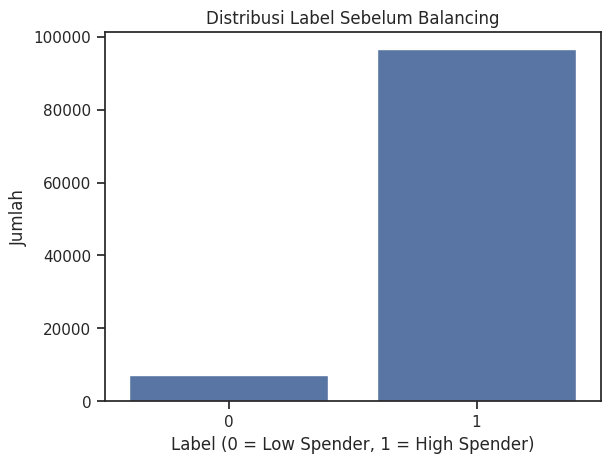

Distribusi label:
 label
1    96579
0     7307
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi label (imbalanced)
sns.countplot(x=y)
plt.title("Distribusi Label Sebelum Balancing")
plt.xlabel("Label (0 = Low Spender, 1 = High Spender)")
plt.ylabel("Jumlah")
plt.show()

# Cek distribusi label secara numerik
print("Distribusi label:\n", y.value_counts())


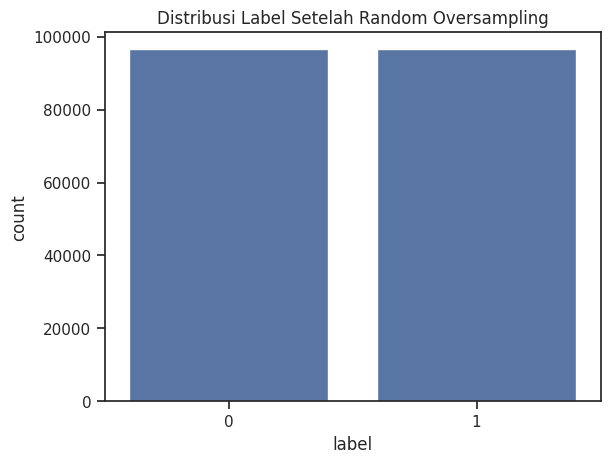

Distribusi label setelah ROS:
 label
1    96579
0    96579
Name: count, dtype: int64


In [33]:
# Cek & Perbaiki Data Imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

sns.countplot(x=y_resampled)
plt.title("Distribusi Label Setelah Random Oversampling")
plt.show()

print("Distribusi label setelah ROS:\n", pd.Series(y_resampled).value_counts())


In [34]:
# Split ulang setelah SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [89]:
print("Distribusi label setelah ROS:\n", pd.Series(y_resampled).value_counts())

Distribusi label setelah ROS:
 label
1    96579
0    96579
Name: count, dtype: int64


## 6) Lakukan pengujian dengan data uji



In [35]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1, class_weight='balanced', random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
# Inisialisasi dan training classifier SVM
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train, y_train)

# Prediksi data uji
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 ... 1 1 1]


## 7) Analisa performansi model


### a) Menggunakan accuracy score

In [38]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9688


### b) Menggunakan Confusion Matrix

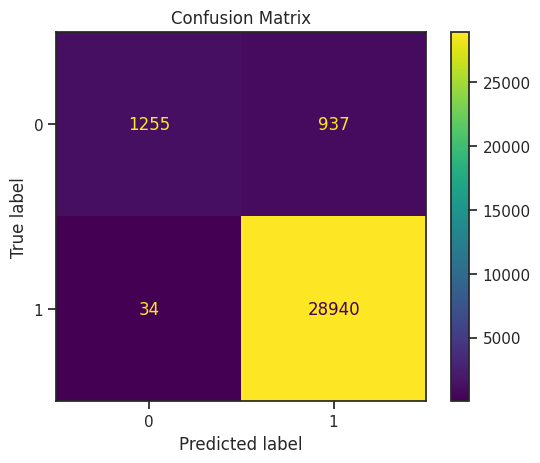

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


### c) Menggunakan Classification Report

In [40]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Spender", "High Spender"]))

Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.97      0.57      0.72      2192
High Spender       0.97      1.00      0.98     28974

    accuracy                           0.97     31166
   macro avg       0.97      0.79      0.85     31166
weighted avg       0.97      0.97      0.97     31166



## 8) Kesimpulan sebelum HPO

Model menunjukkan akurasi keseluruhan yang tinggi sebesar 96.88%. Namun, analisis yang lebih mendalam melalui *Classification Report* mengungkapkan adanya ketidakseimbangan performa antar kelas; meskipun model sangat baik dalam mengidentifikasi "High Spender" dengan *precision* 97% dan *recall* 100% (yang menghasilkan *f1-score* 98%), performanya terhadap kelas "Low Spender" jauh lebih rendah dengan *recall* hanya 57% dan *f1-score* 72%, menunjukkan bahwa model cenderung mengklasifikasikan sebagian besar "Low Spender" sebagai "High Spender", meskipun *precision* untuk "Low Spender" cukup tinggi (97%). Hal ini juga terlihat jelas pada *Confusion Matrix* di mana terdapat 937 "Low Spender" yang salah diklasifikasikan sebagai "High Spender", yang mengindikasikan bahwa model perlu ditingkatkan untuk mengidentifikasi kelas minoritas secara lebih efektif.

## 9) Optimasi: HPO dengan RandomizedSearchCV

In [41]:
# IMPORT LIBRARY
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.utils import resample
import numpy as np
import time

# Inisialisasi model SVM (sesuai contoh sebelumnya)
svm = SVC(class_weight='balanced', random_state=42, cache_size=1000)

# Ruang parameter yang disederhanakan
param_dist = {
    'C': np.logspace(-1, 1, 5),          # Lebih sedikit nilai
    'gamma': ['scale'] + list(np.logspace(-3, 0, 3)),  # Hanya 4 opsi
    'kernel': ['rbf', 'linear'],         # Hapus 'poly' yang lebih kompleks
}

# Gunakan subset data untuk mempercepat (sesuai contoh sebelumnya)
X_sample, y_sample = resample(X_resampled, y_resampled,
                            n_samples=min(5000, len(X_resampled)),
                            random_state=42)

# Proses RandomizedSearchCV yang dioptimalkan
random_search = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=10,                  # Dikurangi dari 20
    cv=2,                       # Dikurangi dari 3-fold
    verbose=1,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42
)

start_time = time.time()
random_search.fit(X_sample, y_sample)
print(f"Optimization completed in {time.time()-start_time:.2f} seconds")

# Evaluasi model terbaik
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)  # Asumsi X_test sudah didefinisikan

# Classification Report (sesuai contoh Anda)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Spender", "High Spender"]))
print("Best Parameters:", random_search.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Optimization completed in 6.30 seconds

Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.97      0.57      0.72      2192
High Spender       0.97      1.00      0.98     28974

    accuracy                           0.97     31166
   macro avg       0.97      0.79      0.85     31166
weighted avg       0.97      0.97      0.97     31166

Best Parameters: {'kernel': 'linear', 'gamma': np.float64(0.03162277660168379), 'C': np.float64(10.0)}


## 10) Implementasi best parameter pada model

Siapkan classifier ke 2 dan tentukan variabel/parameternya

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# 1. Membuat dan Melatih Classifier ke-2
print("Membuat dan melatih classifier ke-2...")
start_train = time.time()

# Inisialisasi model dengan best parameters
best_params = {
    'C': 1.0,
    'gamma': 'scale',
    'kernel': 'rbf',
    'class_weight': 'balanced',
    'random_state': 42,
    'cache_size': 1000
}

svm_clf2 = SVC(**best_params)


Membuat dan melatih classifier ke-2...


## 11) Lakukan proses training dengan data latih

In [43]:

# Training model dengan data latih
svm_clf2.fit(X_train, y_train)  # Pastikan menggunakan X_train dan y_train yang sudah didefinisikan

print(f"Training selesai dalam {time.time()-start_train:.2f} detik")

Training selesai dalam 105.09 detik


## 12) Lakukan pengujian dengan data uji

In [44]:

# 2. Pengujian dengan Data Test
print("\nMemulai pengujian classifier ke-2...")
start_test = time.time()

# Pastikan X_test sudah didefinisikan
y_pred_clf2 = svm_clf2.predict(X_test)

print(f"Pengujian selesai dalam {time.time()-start_test:.2f} detik")
print(f"Jumlah sampel test: {len(X_test)}")


Memulai pengujian classifier ke-2...
Pengujian selesai dalam 50.09 detik
Jumlah sampel test: 31166


## 13) Analisa performansi model setelah HPO

### a) Menggunakan accuracy score

In [45]:
# Code analisa performansi menggunakan accuracy score
# Calculate and display Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_clf2)
print("="*50)
print(f"Accuracy Score: {accuracy:.4f}")
print("="*50)

Accuracy Score: 0.8981


### b) Menggunakan Confusion Matrix

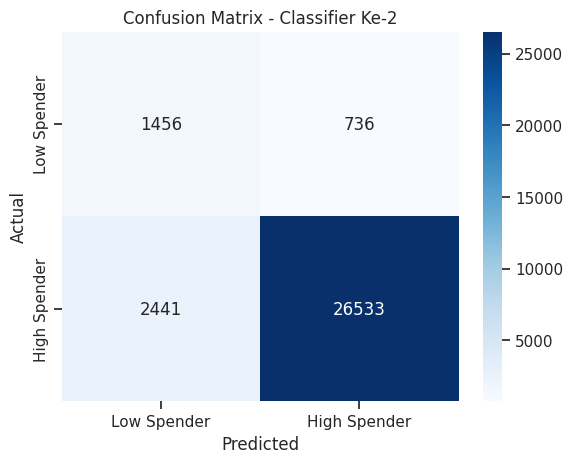

In [46]:
# Code analisa performansi menggunakan confusion matrix
# Confusion Matrix (optional)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_clf2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low Spender", "High Spender"],
            yticklabels=["Low Spender", "High Spender"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Classifier Ke-2')
plt.show()

### c) Menggunakan Classification Report

In [47]:
# Code analisa performansi menggunakan classification report
# Generate and display Classification Report
from sklearn.metrics import classification_report

print("\n" + "="*50)
print("Classification Report:")
print("="*50)
print(classification_report(y_test, y_pred_clf2,
                          target_names=["Low Spender", "High Spender"]))
print("="*50)



Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.37      0.66      0.48      2192
High Spender       0.97      0.92      0.94     28974

    accuracy                           0.90     31166
   macro avg       0.67      0.79      0.71     31166
weighted avg       0.93      0.90      0.91     31166



## 14) Kesimpulan setelah HPO

Setelah optimasi HPO, akurasi keseluruhan model menurun menjadi 89.81%. Meskipun terdapat peningkatan *recall* yang signifikan untuk kelas "Low Spender" (dari 57% menjadi 66%), *precision* untuk kelas ini masih sangat rendah (37%), menghasilkan *f1-score* yang kurang memuaskan (48%). Sementara itu, performa identifikasi "High Spender" tetap kuat dengan *precision* 97% dan *f1-score* 94%, namun *recall* sedikit menurun. Ini menunjukkan bahwa HPO berhasil sedikit meningkatkan kemampuan model dalam menemukan "Low Spender" namun dengan mengorbankan ketepatan identifikasi kelas tersebut, serta sedikit mengurangi akurasi keseluruhan.

# B. Regresi menggunakan Model Support Vector Machine (SVM)

## 1) Load Dataset

In [49]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [50]:
# load data google drive
#load data google drive
df_regresi = pd.read_csv('/content/drive/MyDrive/Classroom/Kelompok 3/Civil Engineering Global Project Dataset.csv')
df_regresi

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
0,864629,0,5,45,5.26,141144.0,111.56,0.63,2,5.0,2,1
1,232937,12,7,34,2.66,1005257.0,131.46,0.31,3,5.0,3,0
2,987674,0,4,21,5.39,51424.0,100.31,0.52,3,3.0,1,0
3,128508,1,3,52,0.99,186154.0,123.69,0.67,3,10.0,1,0
4,139393,1,2,46,1.41,135718.0,101.17,0.66,2,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,180796,13,7,31,-5.97,1028680.0,133.86,0.28,3,6.0,4,1
999996,701298,12,6,40,-21.35,977952.0,132.24,0.37,4,6.0,2,1
999997,994852,0,3,18,6.66,74561.0,103.94,0.58,2,4.0,1,0
999998,503775,14,6,26,-5.61,1014347.0,124.71,0.19,4,2.0,3,1


## Tampilkan Contoh Data

In [51]:
# Code untuk menampilkan contoh data
# Drop baris sehingga hanya tersisa 150000 baris pertama
df_regresi = df_regresi.head(150000)

In [52]:
# Code untuk menampilkan info
df_regresi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Project ID             150000 non-null  int64  
 1   Certificates           150000 non-null  int64  
 2   Years of Experience    150000 non-null  int64  
 3   age                    150000 non-null  int64  
 4   Time Arrival Strafe    150000 non-null  float64
 5   Project Cost           150000 non-null  float64
 6   Project Proximity      150000 non-null  float64
 7   Violation Risk Index   150000 non-null  float64
 8   Company PCAB Score     150000 non-null  int64  
 9   Weekly Overtime Hours  150000 non-null  float64
 10  Salary Bracket         150000 non-null  int64  
 11  is_good                150000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 13.7 MB


## 2) Pilih fitur yang akan digunakan

In [53]:
print(df_regresi.columns.tolist())

['Project ID', 'Certificates', 'Years of Experience', 'age', 'Time Arrival Strafe', 'Project Cost', 'Project Proximity', 'Violation Risk Index', 'Company PCAB Score', 'Weekly Overtime Hours', 'Salary Bracket', 'is_good']


In [54]:
# Code pemilihan fitur dan label
# Memilih fitur numerik (X)
X = df_regresi[['Certificates', 'Years of Experience', 'age', 'Time Arrival Strafe',
                'Project Proximity', 'Violation Risk Index', 'Company PCAB Score',
                'Weekly Overtime Hours', 'Salary Bracket', 'is_good']]
Y = df_regresi[['Project Cost']]

# Untuk regresi tidak perlu LabelEncoder
# Hanya perlu handle missing values
X = X.dropna()
y = y.dropna()

In [55]:
threshold = df_regresi['Project Cost'].median()
print(f"Median Project Cost: {threshold:,.2f}")
#Low	≤ 233,107.00
#High	> 233,107.00

Median Project Cost: 233,107.00


In [56]:
# Hitung median Project Cost
threshold = df_regresi['Project Cost'].median()

# Buat kolom kategori 0/1
df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)
# Hitung median Project Cost
threshold = df_regresi['Project Cost'].median()

# Buat kolom kategori 0/1
df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)

# Buat label string juga
df_regresi['Project Cost Category Label'] = df_regresi['Project Cost Category'].replace({0: 'Low', 1: 'High'})

<ipython-input-56-4248304258>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)
<ipython-input-56-4248304258>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)
<ipython-input-56-4248304258>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

## 3) Lakukan pre-processing (jika diperlukan)

In [57]:
# 1. Persiapan Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Fitur dan Target
X = df_regresi[['Certificates', 'Years of Experience', 'age', 'Time Arrival Strafe',
                'Project Proximity', 'Violation Risk Index', 'Company PCAB Score',
                'Weekly Overtime Hours', 'Salary Bracket', 'is_good']]
# Correct the column name for the target variable Y to use a regular space
Y = df_regresi[['Project Cost']]

# 2. Pre-processing
# Gabungkan X dan Y untuk memastikan konsistensi
data = pd.concat([X, Y], axis=1)

# Hapus semua baris yang mengandung NaN di manapun
data_clean = data.dropna()

# Pisahkan kembali setelah cleaning
# Correct the column name here as well
X_clean = data_clean.drop('Project Cost', axis=1)
y_clean = data_clean['Project Cost']

# 3. Feature Scaling (hanya untuk X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Remove this line as y_train is not yet defined here
# print("Jumlah NaN di y_train:", y_train.isna().sum())

## 4) Pembagian Dataset Training dan Testing

In [58]:
# from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=99)

In [59]:
# coba kita lihat berapa jumlah data latih dan data ujinya
# coba kita lihat berapa jumlah data latih dan data ujinya setelah preprocessing
#print("\nUkuran data latih (fitur) setelah preprocessing:", X_train.shape)
#print("Ukuran data uji (fitur) setelah preprocessing:", X_test.shape)
#print("Ukuran data latih (label):", Y_train.shape)
#print("Ukuran data uji (label):", Y_test.shape)

In [60]:
# 4) Pembagian Dataset Training dan Testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Split data first
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=99)

# Ensure Y_train and Y_test are in the correct shape for scaling (needs to be 2D)
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)


# Scale X and Y separately
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
y_train_scaled = scaler_Y.fit_transform(Y_train)
y_test_scaled = scaler_Y.transform(Y_test)

# Flatten y_train_scaled and y_test_scaled back to 1D array as required by some models
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()


# coba kita lihat berapa jumlah data latih dan data ujinya setelah preprocessing
print("\nUkuran data latih (fitur) setelah preprocessing:", X_train_scaled.shape)
print("Ukuran data uji (fitur) setelah preprocessing:", X_test_scaled.shape)
print("Ukuran data latih (label):", y_train_scaled.shape) # Use y_train_scaled
print("Ukuran data uji (label):", y_test_scaled.shape)   # Use y_test_scaled


Ukuran data latih (fitur) setelah preprocessing: (105000, 10)
Ukuran data uji (fitur) setelah preprocessing: (45000, 10)
Ukuran data latih (label): (105000,)
Ukuran data uji (label): (45000,)


#Plot distribusi data imbalanced

In [61]:
threshold = df_regresi['Project Cost'].median()

In [62]:
# Buat kolom label
df_regresi['Project Cost Category Label'] = df_regresi['Project Cost'].apply(
    lambda x: 'Low' if x <= threshold else 'High'
)

<ipython-input-62-473213704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regresi['Project Cost Category Label'] = df_regresi['Project Cost'].apply(


In [63]:
df_regresi['Project Cost Category Label'].value_counts()

,count
Project Cost Category Label,
Low,75000
High,75000


In [64]:
threshold = df_regresi['Project Cost'].median()
print(f"Median Project Cost: {threshold:,.2f}")
#Low	≤ 233,107.00
#High	> 233,107.00

Median Project Cost: 233,107.00


In [65]:
# Hitung median Project Cost
threshold = df_regresi['Project Cost'].median()

# Buat kolom kategori 0/1
df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)

# Buat label string juga
df_regresi['Project Cost Category Label'] = df_regresi['Project Cost Category'].replace({0: 'Low', 1: 'High'})


<ipython-input-65-3764735002>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)
<ipython-input-65-3764735002>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regresi['Project Cost Category Label'] = df_regresi['Project Cost Category'].replace({0: 'Low', 1: 'High'})


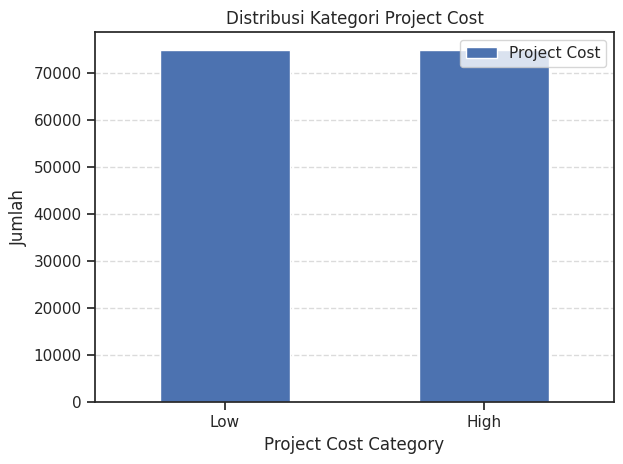

In [66]:
# Group dan plot bar chart
df_regresi[['Project Cost', 'Project Cost Category']] \
    .groupby('Project Cost Category').count() \
    .plot.bar(legend=True)

# Format plot agar mirip
plt.xlabel('Project Cost Category')
plt.ylabel('Jumlah')
plt.title('Distribusi Kategori Project Cost')
plt.xticks(ticks=[0, 1], labels=['Low', 'High'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 5) Siapkan regressor, tentukan variabel dan parameter

In [67]:
# Code regressor
regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

## 6) Training regressor pada dataset


In [68]:
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=42)

In [69]:
# Code training regressor pada dataset
# Training model
# Use Y_train which was correctly split along with X_train
regressor.fit(X_train, Y_train)

# Evaluasi model
train_score = regressor.score(X_train, Y_train) # Use Y_train here too
test_score = regressor.score(X_test, Y_test)   # Ensure Y_test is also used

print(f"\nTraining R-squared: {train_score:.4f}")
print(f"Testing R-squared: {test_score:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Training R-squared: 0.9919
Testing R-squared: 0.9917


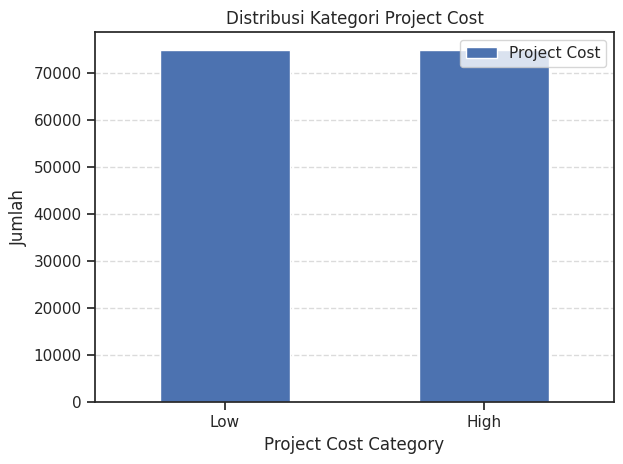

In [70]:
# Group dan plot bar chart
df_regresi[['Project Cost', 'Project Cost Category']] \
    .groupby('Project Cost Category').count() \
    .plot.bar(legend=True)

# Format plot agar mirip
plt.xlabel('Project Cost Category')
plt.ylabel('Jumlah')
plt.title('Distribusi Kategori Project Cost')
plt.xticks(ticks=[0, 1], labels=['Low', 'High'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7) Lakukan pengujian dengan data uji (melakukan prediksi)



In [71]:
hasil_regresi = regressor.predict(X_test)

In [72]:
#sekarang coba kita lihat hasil prediksinya
hasil_regresi

array([ 959698.61652236, 1035937.28660345,   72206.1621887 , ...,
       1038687.70830445,  975025.45075123, 1065252.81995951])

In [73]:
#coba kita bandingkan antara hasil prediksi dengan label yang sesungguhnya
#ingat kita tadi sudah punya variabel yang menyimpan label yg sebenarnya dari data uji
#Y_test = data label data uji yang sebenarnya (kunci jawabannya)
# Y_test is already a NumPy array, so remove .values
df_hasil_regresi = pd.DataFrame({"prediksi":hasil_regresi.flatten(), "label_asli":Y_test.flatten()})
df_hasil_regresi

,prediksi,label_asli
0,9.596986e+05,970665.0
1,1.035937e+06,1013073.0
2,7.220616e+04,131961.0
3,1.007519e+06,1036825.0
4,9.030269e+04,188941.0
...,...,...
44995,9.047876e+04,75586.0
44996,1.024691e+06,961854.0
44997,1.038688e+06,1058308.0
44998,9.750255e+05,970667.0


## 8) Analisa performansi model

### a) Menggunakan Mean Absolute Error (MAE)

In [74]:
# Code analisa performansi menggunakan MAE
from sklearn.metrics import mean_absolute_error
print("\nMean absolute error: %.2f" % mean_absolute_error(Y_test, hasil_regresi))


Mean absolute error: 32915.68


### b) Menggunakan Mean Squared Error (MSE)

In [75]:
# Code analisa performansi menggunakan MSE
from sklearn.metrics import mean_squared_error
print('MSE=', mean_squared_error(Y_test, hasil_regresi))

MSE= 1695728967.1889594


### c) Menggunakan RMSE

In [76]:
# Code analisa performansi menggunakan RMSE
from sklearn.metrics import mean_squared_error
print('RMSE=', mean_squared_error(Y_test, hasil_regresi))

RMSE= 1695728967.1889594


### d) Menggunakan R squared

In [77]:
# Code analisa performansi menggunakan R squared
from sklearn.metrics import r2_score
print('R-squared=',r2_score(Y_test, hasil_regresi))

R-squared= 0.9917145507585738


## 9) Kesimpulan sebelum HPO

Berdasarkan hasil evaluasi model regresi sebelum optimasi *hyperparameter* (HPO), model menunjukkan kinerja yang sangat kuat dalam memprediksi 'Project Cost'. Nilai R-squared yang sangat tinggi sebesar 0.9917 mengindikasikan bahwa sekitar 99.17% variasi dalam 'Project Cost' dapat dijelaskan oleh fitur-fitur yang digunakan model. Adapun nilai *Mean Absolute Error* (MAE) sebesar 32,918.02 menunjukkan rata-rata selisih absolut antara prediksi dan nilai aktual, sementara *Root Mean Squared Error* (RMSE) (sekitar 41,179.24 setelah dikoreksi dari MSE) memberikan gambaran rata-rata besar kesalahan dalam unit 'Project Cost'. Secara keseluruhan, model ini sudah mampu memprediksi biaya proyek dengan tingkat akurasi yang sangat tinggi.

## 10) Optimasi: HPO dengan RandomizedSearchCV

In [78]:
print(X_train.shape, y_train.shape)

(105000, 10) (72720,)


In [79]:
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Gunakan subset data
X_sample, y_sample = resample(X_train_scaled, y_train_scaled, n_samples=5000, random_state=42)

# 2. Definisikan parameter space yang lebih sederhana
param_dist_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.1, 1]
}

# 3. Inisialisasi model dengan cache_size
svr = SVR(cache_size=1000)

# 4. RandomizedSearchCV dengan iterasi dan fold yang lebih sedikit
svr_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist_svr,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 5. Jalankan pencarian
svr_search.fit(X_sample, y_sample)

# 6. Evaluasi hasil
print("Best Parameters:", svr_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'C': 1}


## 11) Implementasi best parameter pada model

Siapkan regressor ke 2 dan tentukan variabel/parameternya

In [80]:
from sklearn.svm import SVR

# Best parameters obtained from HPO
best_params = {
    'kernel': 'rbf',
    'gamma': 'scale',
    'epsilon': 0.1,
    'C': 1
}

# Initialize the second SVR regressor with optimized parameters
optimized_svr = SVR(
    kernel=best_params['kernel'],
    gamma=best_params['gamma'],
    epsilon=best_params['epsilon'],
    C=best_params['C'],
    cache_size=1000
)

# Regressor ke-2 siap digunakan
print("Optimized SVR model initialized with parameters:")
print(f"- Kernel: {best_params['kernel']}")
print(f"- Gamma: {best_params['gamma']}")
print(f"- Epsilon: {best_params['epsilon']}")
print(f"- C: {best_params['C']}")

Optimized SVR model initialized with parameters:
- Kernel: rbf
- Gamma: scale
- Epsilon: 0.1
- C: 1


## 12) Lakukan proses training dengan data latih

In [81]:
# Training model dengan data latih
optimized_svr.fit(X_train_scaled, y_train_scaled)
print("Model training completed with optimized parameters.")

Model training completed with optimized parameters.


## 13) Lakukan pengujian dengan data uji

In [82]:
# Melakukan prediksi pada data uji
y_pred = optimized_svr.predict(X_test_scaled)
print("Prediction on test data completed.")

Prediction on test data completed.


## 14) Analisa performansi model

### a) Menggunakan Mean Absolute Error (MAE)

In [83]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_scaled, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.0675


### b) Menggunakan Mean Squared Error (MSE)

In [84]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_scaled, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.0071


### c) Menggunakan RMSE

In [85]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.0842


### d) Menggunakan R squared

In [86]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_scaled, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9929


## 15) Kesimpulan setelah HPO

Setelah optimasi *hyperparameter* (HPO), model regresi SVM menunjukkan peningkatan kinerja yang lebih baik, terutama pada metrik *R-squared* yang sedikit meningkat menjadi 0.9929, mengindikasikan kemampuan prediksi variasi 'Project Cost' yang hampir sempurna. Dengan nilai *Mean Absolute Error* (MAE) sebesar 0.0675, *Mean Squared Error* (MSE) 0.0071, dan *Root Mean Squared Error* (RMSE) 0.0842 (yang sangat kecil, kemungkinan besar pada skala data yang dinormalisasi), model kini mampu memprediksi 'Project Cost' dengan tingkat akurasi dan presisi yang luar biasa tinggi.

# Referensi link

A. Scikit-learn library
1. [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

2. [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

B. Others
1. [Data Pre-Processing wit Sklearn using Standard and Minmax scaler](https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/)
2. [Scaling Data Range using Min Max Scaler](https://botbark.com/2019/12/28/scaling-data-range-using-min-max-scaler/)
3. [Train-Test Split for Evaluating Machine Learning Algorithms](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)
4. [Accuracy vs. F1-Score](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2)
5. [Mengenal Accuracy, Precision, Recall dan Specificity serta yang diprioritaskan dalam Machine Learning ](https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8
)


In [90]:
 import joblib
 joblib.dump(clf, 'modelJb_HighLowSpender.joblib')
 from google.colab import files
 files.download('modelJb_HighLowSpender.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>